# Project: Investigate a Dataset (TMDb Movies Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
<p>Since the invention of motion pictures, many movies have been produced across different genres.</p>

<p>The Movie Database (TMDB) is a community built movie and TV database. It is a reputable source of movies data avaiblable on the internet. Since 2008, TMDb has consistently kept an up to date record of movies records.</p>

<p> In order to help better understand the investigation, below is a description of the content of each column</p>
<ul>
<li> <b>id:</b> THis is the unique identifier for each movie in the dataset.
<li> <b>Popularity:</b> This is the popularity rating for each movie. 
<li> <b>Budget:</b> This is the budgeted amount for the production of the movie.
<li> <b>Revenue:</b>  This is revenue generated by the movie after its release.
<li> <b>Original_title:</b> The original title of the movie.
<li> <b>Cast:</b> This is the cast of the movie. 
<li> <b>Director:</b> The directors of the movie.
<li> <b>Runtime:</b> The time in minutes the movie runs for. 
<li> <b>Production_companies:</b> This columns carries the companies that produced the movie. 
<li> <b>Release_date:</b> This the year the movies are intended to be released.
<li> <b>Vote_count:</b> A count of votes on a movie.
<li> <b>Vote_average:</b> Average vote per movie.
<li> <b>Budget_adj:</b> This column represents the adjusted budget accounting for inflation.
<li> <b>Revenue_adj:</b> This the adjusted revenue per movies accounting for inflation.
</ul>
<p> We will investigate the data we have pulled from TMDb with the goal of getting insights and answering some pertinent questions. These questions are as follows:</p>

<ol>
<li> What are the 20 most popular movies and what are their features?
<li> What are the 20 highest grossing movies in terms of revenue?
<li> What features are associated with the 20 highest grossing movies? 
<li> Does the budget of a movie affect its revenue or popularity? 
<li> What is the correlation revenue and popularity? 
<li> What is the correlation between the higest grossing movies and their popularity?
</ol>


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> We will attempt to explore the dataset with the goal of identifying the noise within it. These noise will cleaned and made ready to answer the questions we have outlined above.   
### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_movies = pd.read_csv('tmdb-movies.csv')

# a summary look of our data
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# exploring the shape of our data set
df_movies.shape

(10866, 21)

> Above, we can see that there are **10866** rows in our data set with **21** columns or features

In [4]:
# a general info of our data set
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> From the out put above, we can that there are **4** columns in our data set with float datatypes, **6** integer datatype columns and **11** object datatype columns. Additionally, when we look closely, we can see that some of the columns have less than **10866** records. This indicates missing values. We will investigate this further in the cell that follows.  

In [5]:
# checking for null values
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> Above, we can see the columns with missing values and count of missing values they have. We will deal with the missing values depending on how they impact our analysis. 

In [6]:
# drop columns with missing which do not impact our analysis
df_movies = df_movies.drop(['homepage', 'tagline', 'keywords', 'imdb_id', 'overview'], axis=1)

In [7]:
# confirming that the columns above have been dropped
df_movies.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> From the out put above, we have successfully dropped the columns with missing values which we consider irrelevant to the question we want address in this investigation. For the columns which still missing data as you can see above, we will use the mode of the to replace the missing data. This is suitable since the data is categorical in nature.

### Replace missing values
> In this section, we will replace missing values
##### Production_companies column

In [8]:
# determine the mode of the production companies column
df_movies['production_companies'].mode()

0    Paramount Pictures
Name: production_companies, dtype: object

In [9]:
#use fillna() function to fill in missing values using the column's mode
df_movies['production_companies'].fillna('Paramount Pictures', inplace=True)

In [10]:
#confirm missing values have been replaced
df_movies['production_companies'].isnull().sum()

0

##### Director column

In [11]:
# determine the mode of the genres column
df_movies['director'].mode()

0    Woody Allen
Name: director, dtype: object

> Above we can see that the mode in our column is **Woody Allen**. In the cell below, we use the *fillna()* function to replace the null values with the mode.

In [12]:
#use fillna() function to fill in missing values using the column's mode
df_movies['director'].fillna('Woody Allen', inplace=True)

In [13]:
#confirm missing values have been replaced
df_movies['director'].isnull().sum()

0

##### Dropping rows with null values

> We will now drop rows that still have null values within them. Becuase it is a small part of our data set, our data loss is not significant.

In [14]:
# dropping rows with null values
df_movies.dropna(inplace=True)

In [15]:
# confirming that our data set has no null values
df_movies.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

> We can see from the output above that our dataset no longer has any null values.

### Checking for duplicates

> We will now check our dataset to make there are no duplicate entries. 

In [16]:
# checking for duplicates records
df_movies.duplicated().sum()

1

> We can see that we have one duplicate entry in our dataset. To deal with this, we will drop it.  

In [17]:
# dropping duplicates
df_movies.drop_duplicates(inplace=True)

In [18]:
# confirm that duplicate entry has been dropped
df_movies.duplicated().sum()

0

> Now that we have cleaned our data, we will take a look at what the shape of our data looks like and also do some statistical analysis.

#### Shape of the dataset after cleaning

In [19]:
# the shape of the data set
df_movies.shape

(10767, 16)

> Our data set now has **10767** rows and **16** columns after cleaning. 

### Summary Statistical Analysis

> Our goal is to get a summary statistical analysis of our dataset following the cleaning we carried out. This will give an insight into the spread of our data set and also the correlation between our colums. We will also employ the use of some visuals to give us a better perspective. 

In [20]:
# using describe() function to a summary statistics of our dataset.
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10767.000000,10767.000000,1.076700e+04,1.076700e+04,10767.000000,10767.000000,10767.000000,10767.000000,1.076700e+04,1.076700e+04
mean,65477.144144,0.650924,1.475532e+07,4.018610e+07,102.413393,219.137364,5.967549,2001.283459,1.770705e+07,5.183338e+07
std,91703.303390,1.003565,3.102387e+07,1.174783e+08,30.906009,577.964702,0.931426,12.815909,3.442339e+07,1.452125e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10559.500000,0.209957,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20423.000000,0.386062,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,74507.500000,0.719253,1.600000e+07,2.476490e+07,112.000000,147.000000,6.600000,2011.000000,2.103337e+07,3.432264e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> It should be noted that the *describe()* function runs on only numeric data. Hence, the summary statistics it generates is only on dataset that are numeric in nature or continuous variables.  **Count** from the output represents a count of the records in each column whereas *mean* is the average value, *std* is standard deviation. The orders are self explanatory.

<a id='eda'></a>
## Exploratory Data Analysis

> The dataset will be explored with the aim to answer questions which were outlined in the beginning of the report.
### Research Question 1: What are the 20 most popular movies and what are their features?

In [21]:
# we will extract the 20 most popular movies
Top_20_movies = df_movies.sort_values(by='popularity', ascending=False)
Top_20_movies.head(20)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
629,157336,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08
630,118340,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/14,5612,7.9,2014,1.565855e+08,7.122911e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
631,100402,12.971027,170000000,714766572,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,136,Action|Adventure|Science Fiction,Marvel Studios,3/20/14,3848,7.6,2014,1.565855e+08,6.583651e+08
1329,11,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09
632,245891,11.422751,20000000,78739897,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,101,Action|Thriller,Thunder Road Pictures|Warner Bros.|87Eleven|De...,10/22/14,2712,7.0,2014,1.842182e+07,7.252661e+07
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
633,131631,10.739009,125000000,752100229,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,123,Science Fiction|Adventure|Thriller,Lionsgate|Color Force,11/18/14,3590,6.6,2014,1.151364e+08,6.927528e+08


> Above are the 20 most popular movies in our dataset. Interestingly, Jurassic world is considered the most popular movie with 32.9, followed by Mad Max: Fuy Road with 28.4 and Interstellar with 24.9. 

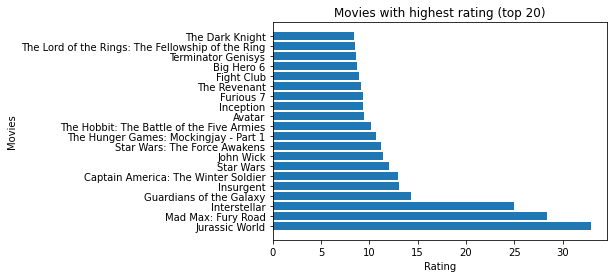

In [29]:
# plotting a graph of movies against their popularity rating
x = Top_20_movies['original_title'].head(20)
y = Top_20_movies['popularity'].head(20)
plt.barh(x, y)
plt.title('Movies with highest rating (top 20)')
plt.xlabel('Rating')
plt.ylabel('Movies')
plt.show()

>The graph above helps us visualize movies against their popularity rating.  

### Research Question 2:  What is the spread of movies according to release?

In [23]:
# count of movies according to release year
movies_by_year = df_movies.groupby(['release_year'])['original_title'].count().reset_index (name="count")

> Above, we grouped and counted our movies by the year they were released and then saved it in a variable.

In [24]:
# we sort the movies in decending order
sorted_by_count_movies = movies_by_year.sort_values(by='count', ascending=False)
sorted_by_count_movies.head(20)

,release_year,count
54,2014,687
53,2013,653
55,2015,620
52,2012,576
51,2011,532
49,2009,528
48,2008,492
50,2010,482
47,2007,435
46,2006,404


> Since our goal is to see the top 20 years with heighest producing movies, we sort the count of movies we did earlier above in descending order and the filter the top 20 using the *head(20)* function.

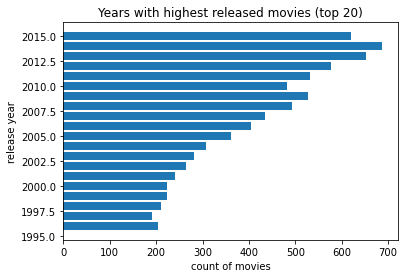

In [27]:
x = sorted_by_count_movies['release_year'].head(20)
y = sorted_by_count_movies['count'].head(20)
plt.barh(x,y)
plt.title('Years with highest released movies (top 20)')
plt.xlabel('count of movies')
plt.ylabel('release year')
plt.show()

> Above is a graphical representation of the number of movies produced yearly. 

### Research Question 3:  What are the 20 highest grossing movies in terms of revenue?

In [30]:
# top five movies by the revenue generated 
movies_by_revenue = df_movies.sort_values(by='revenue', ascending=False)
movie_viz = movies_by_revenue.head(20)
movie_viz

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,597,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,24428,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
14,99861,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09
3374,12445,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,7/7/11,3750,7.7,2011,1.211748e+08,1.287184e+09
5422,109445,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,11/27/13,3369,7.5,2013,1.404050e+08,1.192711e+09
5425,68721,4.946136,200000000,1215439994,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,130,Action|Adventure|Science Fiction,Marvel Studios,4/18/13,6882,6.9,2013,1.872067e+08,1.137692e+09


> In the output above, we are able to see the top five movies with the highest producing revenue. What is also interesting to note is that *Jurassic World* which we earlier saw to be the most popular movies did not turn out to be the highest grossing movie. 

Text(0, 0.5, 'Revenue')

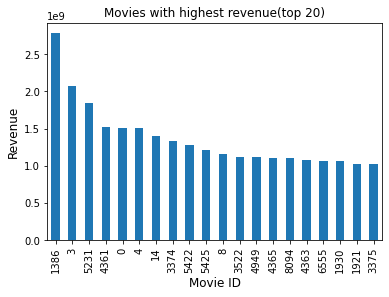

In [44]:
# top 20 movies with the highest revenue  
movie_viz['revenue'].plot.bar();
plt.title('Movies with highest revenue(top 20)')
plt.xlabel('Movie ID', fontsize=12)
plt.ylabel('Revenue', fontsize=12)

> We represent the data we extracted on the highest grossing movies in a bar graph to aid easy visualization.

### Research Question 4:  What is the correlation between budget and revenue?

In [81]:
# a function to calculate correlation between budget and revenue
def finding_corr(df, col_1, col_2):
    for col in df:
        corr_result = df[[col_1, col_2]].corr()
        return corr_result
    
finding_corr(df_movies, 'revenue', 'budget')

,revenue,budget
revenue,1.000000,0.734608
budget,0.734608,1.000000


> From the above output of our query, there exist a strongly positive correlation *0.73* between the budget of a movie and the revenue generated by that movie. It is therefore safe to say that the more money spent in the production of a movie, the more likely the movie will generate high revenue.

<AxesSubplot:>

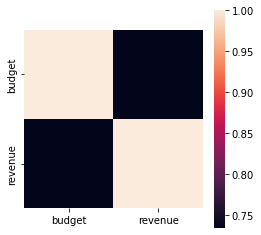

In [86]:
# function to plot correlation heatmaps
def corr_heatmap(df, col_1, col_2):
    for col in df:
        plt.figure(figsize=(4,4))
        corr_hmap = sns.heatmap(df[[col_1, col_2]].corr(), square=True)
        return corr_hmap

finding_corr(df_movies, 'budget', 'revenue')  

> Above is a heatmap of the correlation between budget and revenue.

### Research Question 5:  What is the correlation between revenue and popularity?

In [82]:
# calling finding_corr function correlation between revenue and popularity
finding_corr(df_movies, 'revenue', 'popularity')

,revenue,popularity
revenue,1.000000,0.662994
popularity,0.662994,1.000000


> We can see from the code block above that there is a positive correlation between revenue and popularity. This is equally represented in the heatmap below. The dark squares shows the correlation between the popularity of a movie and the revenue generated from that movie.

<AxesSubplot:>

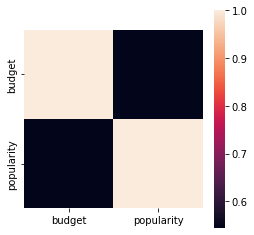

In [87]:
# plotting a correlation heatmap of revenue and popularity  
finding_corr(df_movies, 'budget', 'popularity')  

<a id='conclusions'></a>
## Conclusions

> The TMDb movies dataset had 10866 rows and 21 columns. After cleaning which involved removing duplicates, null values and deleting irrelevant columns, we were left with 10767 rows and 16 columns. The dataset was investigated upon some questions which were posed at the begining and the following have been reached:
#### Observations
<ol>
<li> The most popular movies did not make the highest revenues.
<li> The year 2014 saw the production of the highest number of movies at 687.
<li> The movie Avatar generated a revenue of 2,781,505,847 and had a popularity score 9.4 whereas Jurassic world generated 1,513,528,810 and had a popularity score of 32.9.
<li> The top 20 movies that generated the highest revenue are mostly action, science fiction and adventure.
<li> There is a positive correlation of 0.734608 between the budget made for a movie and the revenue generated. This indicates that the amount spent in the production of a movie positively impacts the amount generated by the movie.
<li> The popularity of a movies does not translate to higher revenue from the movies.
</ol>

#### Limitations
Some limitations to this investigation include:
<ol>
    <li> Some of the columns had incomplete records which resulted in deleting those columns. Indeed, had the records been complete, it would have added depth to the investigation.
    <li> Time has also been another factor, dedicating more time to the research will result in more findings.
</ol>